<a href="https://colab.research.google.com/github/LDY55/test/blob/main/TestTask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Одним из ключевых навыков ассиетнта является возможность совершать покупки и переводы, поэтому необходимо обратить внмание на следующие характеристики: 
1. Скорость распознания запроса 
2. Точность соответствия
3. Скорость отклика

Для вовлечения большего числа пользователей асситент должен быть более интерактивным, а значит необходимы навыки связаные с различными формами игр и общении. Так как Сбер располагает одной из самых больших моделей обученных на GPT-3 то возможо добавить игру на подобие Акинатора, преимущество же будет в том, что обученная модель может предлагать не только заготовленные ответы, но воспринимать комментарии. В навыках связанных с играми стоит обратить внимание на следующие параметры: 
1. Вовлеченность (сколько времени пользователь провёл в приложении)
2. Соответствие ожиданиям (насколько ассистент адекватен пользователю)
3. Целевые действия 

Поскольку ассисент является частью экосистемы Сбер, а значит пользуются им люди разных возрастов, а это значит что асситент должен быть "на одной волне" с пользователем. Для нывыка "на одной волне" необходимо отследить следующие характеристики: 
1. Способ ввода запросов 
2. Скорость ввода запроса (если ручной)
3. Соответствие запросу (влияет на вовлеченность)
4. Вовлеченность 
5. Удовлетворенность результатом (соответствие запросов и результатов)


---



Работа с данными


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('1.csv', delimiter=';', encoding='utf-8') #считываем файл выгрузки 

data = df[df['dp_project']=='video'][:1000] #получим данные с выборкой по сценарию видео
data['dp_query'].to_csv('output_dp_query_video.csv', index = False) #выгрузим запросы в файл

10 самых популярных сценариев

In [12]:
df['dp_project'].value_counts()[1:10]

youtube                                 1729
Axon                                    1642
Музыка                                  1237
Выбор персонажа                          409
Хранитель Слов                           407
Погода                                   407
790ceaf2-f4ae-4700-9d17-2b893a226539     363
Заказ продуктов                          332
Города                                   307
Name: dp_project, dtype: int64

In [13]:
c = df['dp_project'].value_counts()[1:10].keys().tolist() #получим 10 самых популярнных запросов в виде списка
print (c)

['youtube', 'Axon', 'Музыка', 'Выбор персонажа', 'Хранитель Слов', 'Погода', '790ceaf2-f4ae-4700-9d17-2b893a226539', 'Заказ продуктов', 'Города']


In [14]:
for i in c: #выгрузим 10 популярных запросов в файлы
  data = df[df['dp_project']==f'{i}'][:1000]
  data['dp_query'].to_csv(f'output_dp_query_{i}.csv', index = False) 

Строим гистограмму времени исполнения запроса

In [15]:
new_data = pd.to_numeric(df['duration'], errors='coerce')

bins = [-1, 500, 1000, 1500, 2000, np.inf]
labels=['0-500','500-1000','1000-1500', '1500-2000', '2000-2500']
df_duration=new_data.groupby(pd.cut(new_data, bins=bins, labels=labels)).size().reset_index(name='count')
df_duration.head()

,duration,count
0,0-500,4495
1,500-1000,13748
2,1000-1500,2200
3,1500-2000,486
4,2000-2500,188


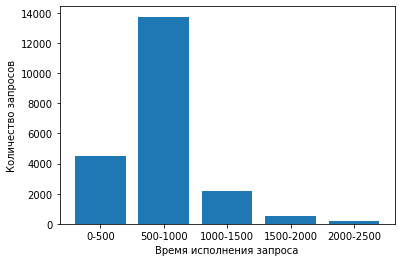

In [16]:
index = df_duration['duration']
values = df_duration['count']
plt.bar(index,values)
plt.xlabel("Время исполнения запроса")
plt.ylabel("Количество запросов")
plt.show()
